###### import necessary packages

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Web Scraping:

###### create functions to pull data from web pages

###### after the functions are created and the scraped data is saved as a pandas dataframe, the tables are cleaned.
###### the money columns are converted from object to float data type for later analysis.

In [3]:
url='https://www.boxofficemojo.com/weekend/by-year/2022/'
response = requests.get(url)
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Oops! Received status code {status}")

In [4]:

def get_daily_movies(soup):
    url='https://www.boxofficemojo.com/daily/2022/?view=year'
    req=requests.get(url)
    content=req.text
    soup=bs(content)
    rows=soup.find_all('tr')
    daily_movies = []
    for row in rows:
        data_row = {}
        data = row.find_all('td')
        if len(data) == 0:
            continue
        data_row['date'] = data[0].text
        data_row['day'] = data[1].text
        data_row['top10gross'] = data[3].text.split('$')[1]
        data_row['releases'] = data[6].text
        data_row['top_release'] = data[7].text
        data_row['gross'] = data[8].text.split('$')[1]
        daily_movies.append(data_row)
    daily_df = pd.DataFrame(daily_movies, columns = ['date', 'day', 'top10gross', 'releases', 'top_release', 'gross'])
    return daily_df


In [62]:
def get_yearly_movies(soup):
    url='https://www.boxofficemojo.com/year/?ref_=bo_nb_hm_secondarytab'
    req=requests.get(url)
    content=req.text
    soup=bs(content)
    rows=soup.find_all('tr')
    yearly_movies = []
    for row in rows:
        data_row = {}
        data = row.find_all('td')
        if len(data) == 0:
            continue
        data_row['year'] = data[0].text
        data_row['total_gross'] = data[1].text.split('$')[1]
        data_row['releases'] = data[3].text
        data_row['avg'] = data[4].text.split('$')[1]
        data_row['top_release'] = data[5].text
        yearly_movies.append(data_row)
    yearly_df = pd.DataFrame(yearly_movies, columns = ['year', 'total_gross', 'releases', 'avg', 'top_release'])
    return yearly_df

yearly = get_yearly_movies(soup)

#convert 
yearly['total_gross'] = yearly['total_gross'].apply(lambda x: float(x.split()[0].replace(',','')))
yearly['avg'] = yearly['avg'].apply(lambda x: float(x.split()[0].replace(',','')))

#yearly

In [6]:
def get_year_rank(soup):
    url='https://www.boxofficemojo.com/year/2022/?ref_=bo_yl_table_2'
    req=requests.get(url)
    content=req.text
    soup=bs(content)
    rows=soup.find_all('tr')
    year_rank = []
    for row in rows:
        data_row = {}
        data = row.find_all('td')
        if len(data) == 0:
            continue
        data_row['rank'] = data[0].text
        data_row['release'] = data[1].text
        data_row['gross'] = data[5].text.split('$')[1]
        data_row['theaters'] = data[6].text
        data_row['total_gross'] = data[7].text.split('$')[1]
        data_row['release_date'] = data[8].text
        year_rank.append(data_row)
    year_rank_df = pd.DataFrame(year_rank, columns = ['rank', 'release', 'gross', 'theaters', 'total_gross','release_date'])
    return year_rank_df

rank = get_year_rank(soup)

#convert 
rank['gross'] = rank['gross'].apply(lambda x: float(x.split()[0].replace(',','')))
rank['total_gross'] = rank['total_gross'].apply(lambda x: float(x.split()[0].replace(',','')))

rank

,rank,release,gross,theaters,total_gross,release_date
0,1,Top Gun: Maverick,718318561.0,"4,751",718732821.0,May 27
1,2,Black Panther: Wakanda Forever,436499646.0,"4,396",453829060.0,Nov 11
2,3,Doctor Strange in the Multiverse of Madness,411331607.0,"4,534",411331607.0,May 6
3,4,Avatar: The Way of Water,401007908.0,"4,340",683046574.0,Dec 16
4,5,Jurassic World: Dominion,376851080.0,"4,697",376851080.0,Jun 10
...,...,...,...,...,...,...
195,196,King Richard,408056.0,"3,302",15129285.0,Nov 19
196,197,Superspreader,399370.0,235,399370.0,Sep 30
197,198,The Inspection,385627.0,144,390429.0,Nov 18
198,199,Alice,372529.0,169,373043.0,Mar 18


In [63]:
def get_monthly_movies(soup):
    url='https://www.boxofficemojo.com/month/by-year/2022/?grossesOption=calendarGrosses'
    req=requests.get(url)
    content=req.text
    soup=bs(content)
    rows=soup.find_all('tr')
    monthly_movies = []
    for row in rows:
        data_row = {}
        data = row.find_all('td')
        if len(data) == 0:
            continue
        data_row['month'] = data[0].text
        data_row['total_gross'] = data[1].text.split('$')[1]
        data_row['percent_year'] = data[2].text
        data_row['releases'] = data[3].text
        data_row['avg'] = data[4].text.split('$')[1]
        data_row['top_release'] = data[5].text
        data_row['gross'] = data[9].text.split('$')[1]
        data_row['percent_total'] = data[10].text
        monthly_movies.append(data_row)
    monthly_movies_df = pd.DataFrame(monthly_movies, columns = ['month', 'total_gross', 'percent_year', 'releases','avg','top_release', 'gross','percent_total'])
    return monthly_movies_df

monthly = get_monthly_movies(soup)

#convert 
monthly['gross'] = monthly['gross'].apply(lambda x: float(x.split()[0].replace(',','')))
monthly['total_gross'] = monthly['total_gross'].apply(lambda x: float(x.split()[0].replace(',','')))
monthly['avg'] = monthly['avg'].apply(lambda x: float(x.split()[0].replace(',','')))

#monthly

In [8]:
def get_holiday_movies(soup):
    url='https://www.boxofficemojo.com/holiday/by-year/2022/?grossesOption=calendarGrosses'
    req=requests.get(url)
    content=req.text
    soup=bs(content)
    rows=soup.find_all('tr')
    holiday_movies = []
    for row in rows:
        data_row = {}
        data = row.find_all('td')
        if len(data) == 0:
            continue
        data_row['holiday'] = data[0].text
        data_row['total_gross'] = data[1].text.split('$')[1]
        data_row['percent_year'] = data[2].text
        data_row['releases'] = data[3].text
        data_row['avg'] = data[4].text.split('$')[1]
        data_row['top_release'] = data[5].text
        data_row['gross'] = data[9].text.split('$')[1]
        data_row['percent_total'] = data[10].text
        holiday_movies.append(data_row)
    holiday_movies_df = pd.DataFrame(holiday_movies, columns = ['holiday', 'total_gross', 'percent_year', 'releases','avg','top_release', 'gross','percent_total'])
    return holiday_movies_df

holiday = get_holiday_movies(soup)

#convert 
holiday['gross'] = holiday['gross'].apply(lambda x: float(x.split()[0].replace(',','')))
holiday['total_gross'] = holiday['total_gross'].apply(lambda x: float(x.split()[0].replace(',','')))
holiday['avg'] = holiday['avg'].apply(lambda x: float(x.split()[0].replace(',','')))

In [85]:
def get_weekly_movies(soup):
    url='https://www.boxofficemojo.com/weekly/by-year/2022/'
    req=requests.get(url)
    content=req.text
    soup=bs(content)
    rows=soup.find_all('tr')
    weekly_movies = []
    for row in rows:
        data_row = {}
        data = row.find_all('td')
        if len(data) == 0:
            continue
        data_row['dates'] = data[0].text
        data_row['overall_gross'] = data[3].text.split('$')[1]
        data_row['releases'] = data[5].text
        data_row['top_release'] = data[6].text
        data_row['week'] = data[10].text
        weekly_movies.append(data_row)
    weekly_movies_df = pd.DataFrame(weekly_movies, columns = ['dates','overall_gross','releases','top_release','week'])
    return weekly_movies_df

weekly = get_weekly_movies(soup)

#convert 
weekly['overall_gross'] = weekly['overall_gross'].apply(lambda x: float(x.split()[0].replace(',','')))
#weekly

,dates,overall_gross,releases,top_release,week
0,"Dec 30-Jan 5, 2023",176585127.0,47,Avatar: The Way of Water,52
1,Dec 23-29,246487640.0,50,Avatar: The Way of Water,51
2,Dec 16-22,236324722.0,47,Avatar: The Way of Water,50
3,Dec 9-15,51441972.0,58,Black Panther: Wakanda Forever,49
4,Dec 2-8,71808894.0,59,Black Panther: Wakanda Forever,48
5,Nov 25-Dec 1,114262463.0,49,Black Panther: Wakanda Forever,47
6,Nov 18-24,166806980.0,54,Black Panther: Wakanda Forever,46
7,Nov 11-17,256405792.0,54,Black Panther: Wakanda Forever,45
8,Nov 4-10,78067175.0,59,Black Adam,44
9,Oct 28-Nov 3,91912422.0,61,Black Adam,43


## Analysis

###### data exploration and checking that money data conversion worked.

In [9]:
holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   holiday        25 non-null     object 
 1   total_gross    25 non-null     float64
 2   percent_year   25 non-null     object 
 3   releases       25 non-null     object 
 4   avg            25 non-null     float64
 5   top_release    25 non-null     object 
 6   gross          25 non-null     float64
 7   percent_total  25 non-null     object 
dtypes: float64(3), object(5)
memory usage: 1.7+ KB


## Q1 - What holiday had the highest or lowest cumulative gross in 2022?

###### find the highest/lowest cumulative gross' for 2022 via the sort function and saving them to their own table.

In [10]:
holiday=holiday.drop(columns=['releases','avg'])
low_holiday = holiday.sort_values(by=['total_gross']).head(5).reset_index()

low_holiday

,index,holiday,total_gross,percent_year,top_release,gross,percent_total
0,8,Halloween,7440404.0,0.1%,Black Adam,1977587.0,26.6%
1,9,Indigenous People's Day,8616769.0,0.1%,Smile,2665031.0,30.9%
2,21,MLK Day,13547490.0,0.2%,Spider-Man: No Way Home,4555918.0,33.6%
3,11,Labor Day,15686573.0,0.2%,Top Gun: Maverick,1906497.0,12.2%
4,19,President's Day,16906848.0,0.2%,Uncharted,7305676.0,43.2%


In [11]:
high_holiday = holiday.sort_values(ascending=[False],by=['total_gross']).head(5).reset_index()

high_holiday

,index,holiday,total_gross,percent_year,top_release,gross,percent_total
0,14,Independence Day Weekend,223580059.0,3%,Minions: The Rise of Gru,123087240.0,55.1%
1,16,Memorial Day Weekend,223364859.0,3%,Top Gun: Maverick,160514980.0,71.9%
2,2,Christmas Weekend,142814390.0,1.9%,Avatar: The Way of Water,95608650.0,66.9%
3,24,New Year Weekend,136047635.0,1.8%,Avatar: The Way of Water,88820777.0,65.3%
4,7,Thanksgiving 5-Day Weekend,134030714.0,1.8%,Black Panther: Wakanda Forever,63800856.0,47.6%


###### Create bar charts for visualization.

/Users/sambrayton/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


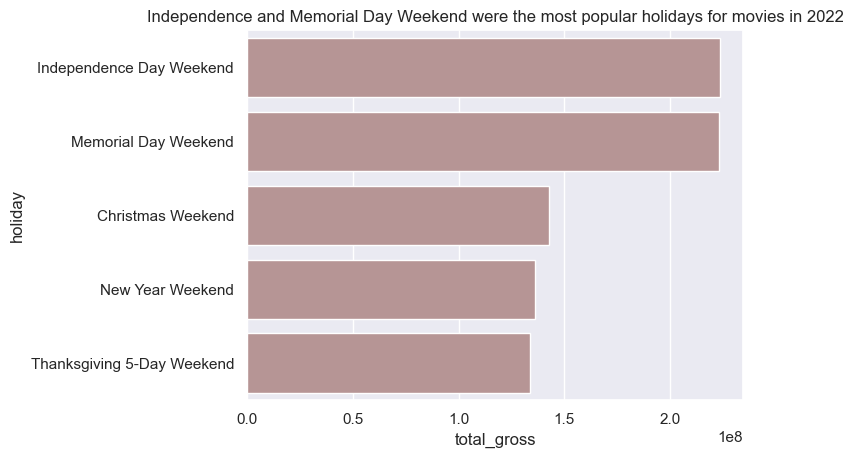

In [152]:
#plt.barh(high_holiday.holiday,high_holiday['total_gross'])
sns.barplot(high_holiday['total_gross'],high_holiday.holiday,color='rosybrown')
plt.title("Independence and Memorial Day Weekend were the most popular holidays for movies in 2022")
plt.show()

/Users/sambrayton/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


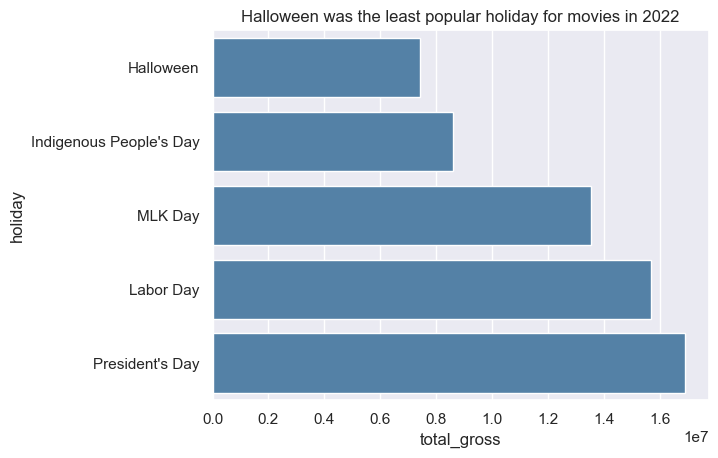

In [151]:
#plt.barh(low_holiday.holiday,low_holiday['total_gross'])
sns.barplot(low_holiday['total_gross'],low_holiday.holiday, color='steelblue')
plt.title("Halloween was the least popular holiday for movies in 2022")
plt.show()

/Users/sambrayton/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


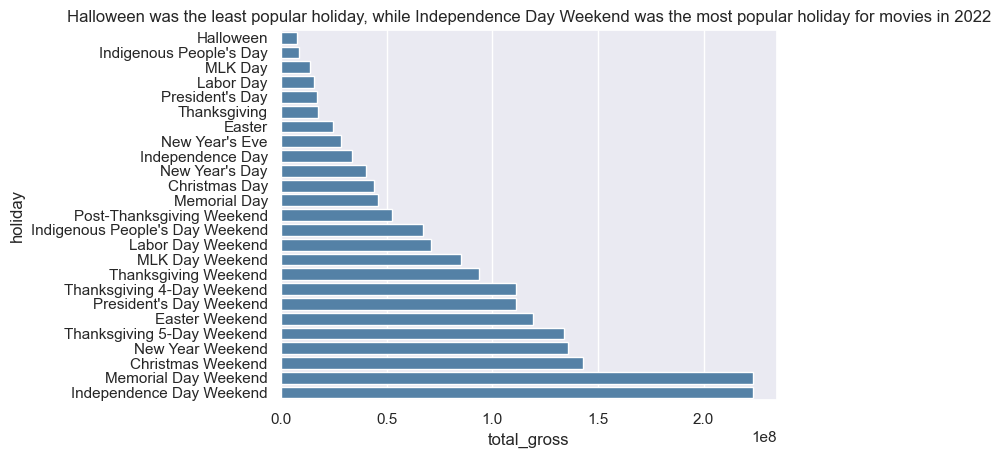

In [150]:
holiday = holiday.sort_values(by=['total_gross'])
#plt.barh(holiday.holiday,holiday['total_gross'])
sns.barplot(holiday['total_gross'],holiday.holiday,color='steelblue')
plt.title("Halloween was the least popular holiday, while Independence Day Weekend was the most popular holiday for movies in 2022")
plt.show()

## Q2 - Which month had the highest or lowest cumulative gross?

###### data exploration and checking that money data conversion worked.

In [14]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          12 non-null     object 
 1   total_gross    12 non-null     float64
 2   percent_year   12 non-null     object 
 3   releases       12 non-null     object 
 4   avg            12 non-null     float64
 5   top_release    12 non-null     object 
 6   gross          12 non-null     float64
 7   percent_total  12 non-null     object 
dtypes: float64(3), object(5)
memory usage: 896.0+ bytes


###### find the highest/lowest cumulative gross' for months in 2022 via the sort function and saving them to their own table.

In [15]:
#monthly=monthly.drop(columns=['releases','avg','percent_total','percent_year'])
low_month = monthly.sort_values(by=['total_gross']).head(5).reset_index()

low_month

,index,month,total_gross,percent_year,releases,avg,top_release,gross,percent_total
0,3,September,323164260.0,4.4%,133,2429806.0,The Woman King,41487506.0,12.8%
1,10,February,365862371.0,5%,80,4573279.0,Uncharted,84618436.0,23.1%
2,11,January,389782780.0,5.3%,66,5905799.0,Spider-Man: No Way Home,163815488.0,42%
3,4,August,466948665.0,6.3%,92,5075528.0,Bullet Train,80030018.0,17.1%
4,2,October,469077379.0,6.4%,124,3782882.0,Black Adam,112888394.0,24.1%


In [16]:
high_month = monthly.sort_values(ascending=[False],by=['total_gross']).head(5).reset_index()

high_month

,index,month,total_gross,percent_year,releases,avg,top_release,gross,percent_total
0,5,July,1.133501e+09,15.4%,91,12456054.0,Minions: The Rise of Gru,320494170.0,28.3%
1,6,June,9.688700e+08,13.1%,94,10307127.0,Top Gun: Maverick,362159641.0,37.4%
2,7,May,7.858858e+08,10.7%,88,8930520.0,Doctor Strange in the Multiverse of Madness,376528475.0,47.9%
3,0,December,6.778896e+08,9.2%,103,6581452.0,Avatar: The Way of Water,401007908.0,59.2%
4,1,November,6.279670e+08,8.5%,104,6038144.0,Black Panther: Wakanda Forever,374279837.0,59.6%


###### Create charts for visualization.

/Users/sambrayton/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


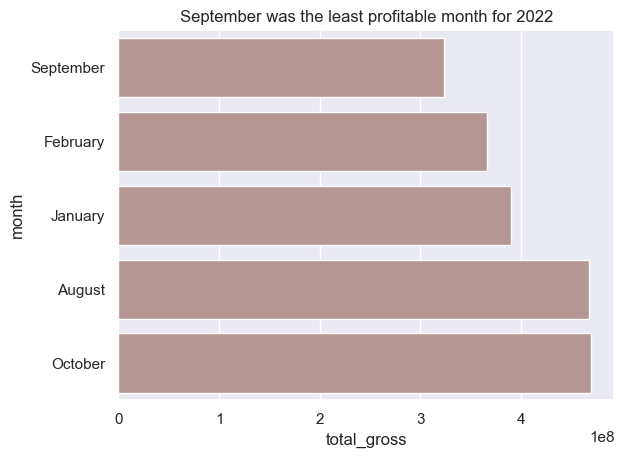

In [140]:
#plt.barh(low_month.month,low_month['total_gross'])
sns.barplot(low_month['total_gross'],low_month.month,color='rosybrown')
plt.title("September was the least profitable month for 2022")
plt.show()

/Users/sambrayton/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


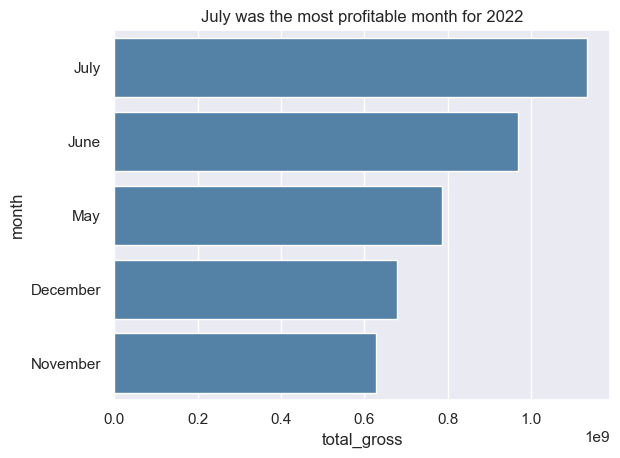

In [138]:
#plt.barh(high_month.month,high_month['total_gross'])
sns.barplot(high_month['total_gross'],high_month.month,color='steelblue')
plt.title("July was the most profitable month for 2022")
plt.show()

/Users/sambrayton/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


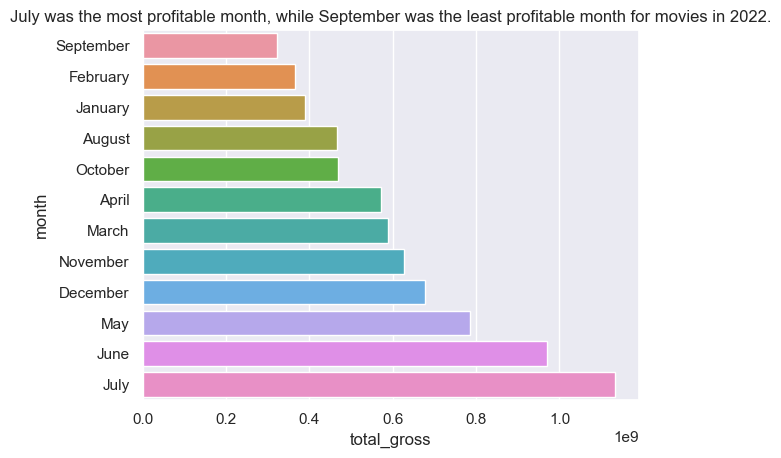

In [137]:
month = monthly.sort_values(by=['total_gross'])
#plt.barh(month.month,month['total_gross'])
sns.barplot(month['total_gross'],month.month)
plt.title("July was the most profitable month, while September was the least profitable month for movies in 2022.")
plt.show()

Text(0.5, 1.0, 'July was the most profitable month, while September was the least profitable month for movies in 2022.')

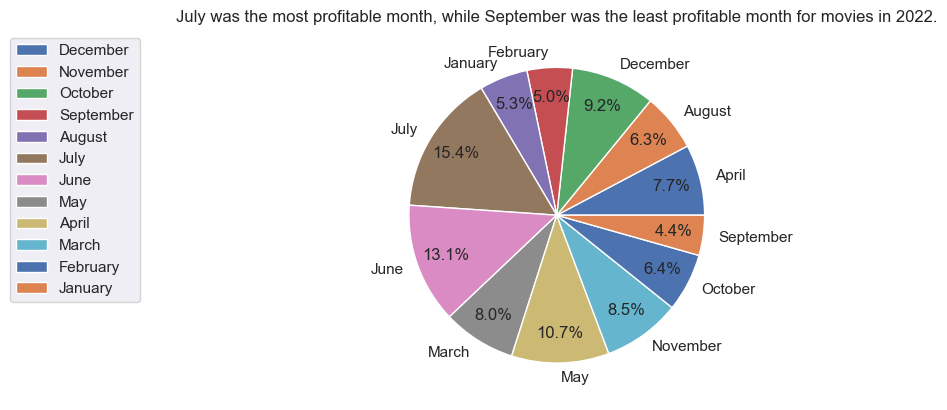

In [153]:
month=month.sort_values(by=['month'])
plt.pie(month['total_gross'],labels=month.month,autopct='%1.1f%%',pctdistance=.8)
plt.legend(monthly.month,loc="upper left",bbox_to_anchor=(-1,1))
plt.title("July was the most profitable month, while September was the least profitable month for movies in 2022.")

## Q3 - What year had the highest or lowest gross?


###### data exploration and checking that money data conversion worked.

In [20]:
yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         47 non-null     object 
 1   total_gross  47 non-null     float64
 2   releases     47 non-null     object 
 3   avg          47 non-null     float64
 4   top_release  47 non-null     object 
dtypes: float64(2), object(3)
memory usage: 2.0+ KB


###### find the highest/lowest total gross by year via the sort function and saving them to their own table.

In [154]:
low_year=yearly.sort_values(by=['total_gross']).head(10).reset_index()
low_year.head(10)

,index,year,total_gross,releases,avg,top_release
0,46,1977,4.434975e+08,9,49277495.0,Star Wars: Episode IV - A New Hope
1,45,1978,8.264130e+08,13,63570231.0,Grease
2,42,1981,8.986870e+08,56,16047981.0,Superman II
3,44,1979,1.229428e+09,40,30735711.0,Superman
4,43,1980,1.642401e+09,68,24152952.0,Star Wars: Episode V - The Empire Strikes Back
5,3,2020,2.113847e+09,456,4635628.0,Bad Boys for Life
6,0,2023,2.349670e+09,210,11188903.0,The Super Mario Bros. Movie
7,40,1983,2.738195e+09,149,18377150.0,Star Wars: Episode VI - Return of the Jedi
8,41,1982,3.001761e+09,132,22740616.0,E.T. the Extra-Terrestrial
9,38,1985,3.017379e+09,191,15797796.0,Back to the Future


In [155]:
high_year=yearly.sort_values(ascending=[False],by=['total_gross']).head(10).reset_index()
high_year.head(10)

,index,year,total_gross,releases,avg,top_release
0,5,2018,1.189216e+10,993,11975991.0,Black Panther
1,7,2016,1.137523e+10,855,13304357.0,Finding Dory
2,4,2019,1.136336e+10,910,12487209.0,Avengers: Endgame
3,8,2015,1.114878e+10,845,13193823.0,Jurassic World
4,6,2017,1.107539e+10,854,12968837.0,Star Wars: Episode VIII - The Last Jedi
5,10,2013,1.095552e+10,826,13263347.0,Iron Man 3
6,11,2012,1.084364e+10,807,13436978.0,The Avengers
7,14,2009,1.061589e+10,646,16433260.0,Transformers: Revenge of the Fallen
8,13,2010,1.058539e+10,651,16260196.0,Avatar
9,9,2014,1.036886e+10,849,12213029.0,Guardians of the Galaxy


###### Create charts for visualization.

/Users/sambrayton/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


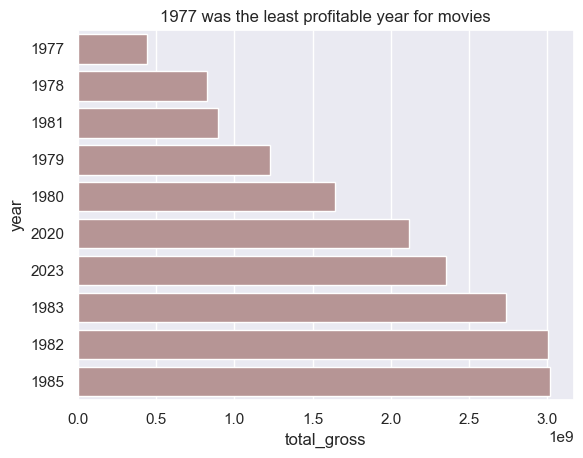

In [125]:
#plt.barh(low_year.year,low_year['total_gross'])
#plt.title("1977 was the least profitable year for movies")
sns.barplot(low_year['total_gross'],low_year.year,color='rosybrown')
plt.title("1977 was the least profitable year for movies")
plt.show()

/Users/sambrayton/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


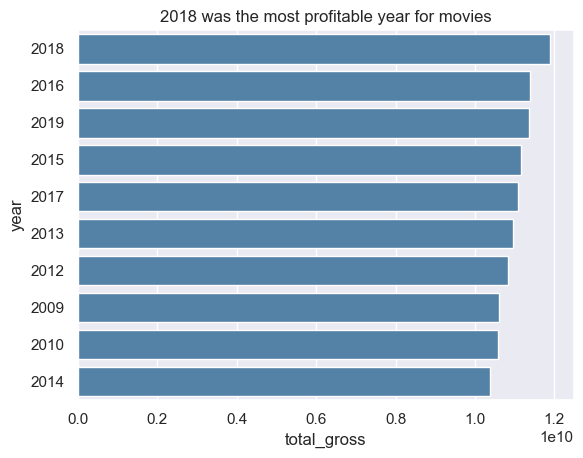

In [123]:
#plt.barh(high_year.year,high_year['total_gross'])
#plt.title("2018 was the most profitable year for movies")
sns.barplot(high_year['total_gross'],high_year.year,color='steelblue')
plt.title("2018 was the most profitable year for movies")
plt.show()

## Q4 - What week in 2022 had the highest or lowest overall gross?


###### data exploration and checking that money data conversion worked.

In [86]:
weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dates          52 non-null     object 
 1   overall_gross  52 non-null     float64
 2   releases       52 non-null     object 
 3   top_release    52 non-null     object 
 4   week           52 non-null     object 
dtypes: float64(1), object(4)
memory usage: 2.2+ KB


###### find the highest/lowest  gross by week via the sort function and saving them to their own table.


In [156]:
week = weekly.sort_values(by=['overall_gross'])
low_week = week.head(10).reset_index()
low_week


,index,dates,overall_gross,releases,top_release,week
0,48,Jan 28-Feb 3,46449926.0,48,Spider-Man: No Way Home,4
1,3,Dec 9-15,51441972.0,58,Black Panther: Wakanda Forever,49
2,16,Sep 9-15,58690664.0,73,Barbarian,36
3,49,Jan 21-27,60746879.0,48,Spider-Man: No Way Home,3
4,15,Sep 16-22,71121269.0,76,The Woman King,37
5,4,Dec 2-8,71808894.0,59,Black Panther: Wakanda Forever,48
6,18,Aug 26-Sep 1,72138144.0,63,The Invitation,34
7,47,Feb 4-10,77019839.0,56,Jackass Forever,5
8,8,Nov 4-10,78067175.0,59,Black Adam,44
9,44,Feb 25-Mar 3,79992208.0,53,Uncharted,8


In [157]:
high_week=weekly.sort_values(ascending=[False],by=['overall_gross']).head(10).reset_index()
high_week

,index,dates,overall_gross,releases,top_release,week
0,25,Jul 8-14,334746945.0,57,Thor: Love and Thunder,27
1,26,Jul 1-7,301253959.0,52,Minions: The Rise of Gru,26
2,29,Jun 10-16,297265363.0,58,Jurassic World: Dominion,23
3,31,May 27-Jun 2,284229658.0,57,Top Gun: Maverick,21
4,34,May 6-12,277112562.0,53,Doctor Strange in the Multiverse of Madness,18
5,7,Nov 11-17,256405792.0,54,Black Panther: Wakanda Forever,45
6,1,Dec 23-29,246487640.0,50,Avatar: The Way of Water,51
7,28,Jun 17-23,241502854.0,58,Jurassic World: Dominion,24
8,2,Dec 16-22,236324722.0,47,Avatar: The Way of Water,50
9,43,Mar 4-10,216125188.0,52,The Batman,9


###### Create charts for visualization.

In [120]:
#plt.barh(high_week.dates,high_week['overall_gross'])
#plt.title("July had the 2 most profitable weeks in 2022 for movies")

In [119]:
#plt.barh(low_week.dates,low_week['overall_gross'])
#plt.title("Jan 28-Feb 3 was the least profitable week in 2022 for movies")

/Users/sambrayton/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


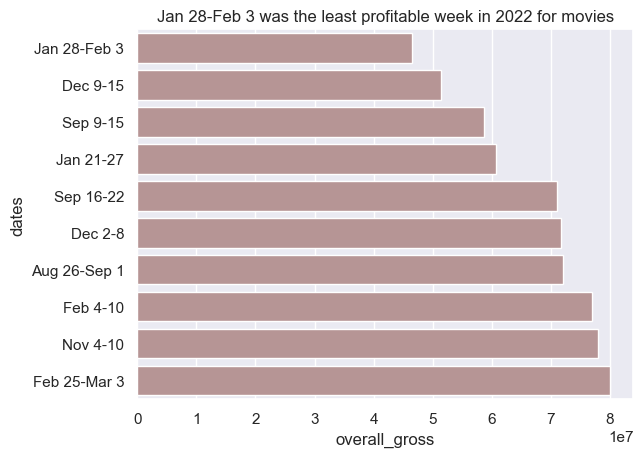

In [118]:
sns.barplot(low_week['overall_gross'],low_week.dates,color='rosybrown')
plt.title("Jan 28-Feb 3 was the least profitable week in 2022 for movies")
plt.show()

/Users/sambrayton/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


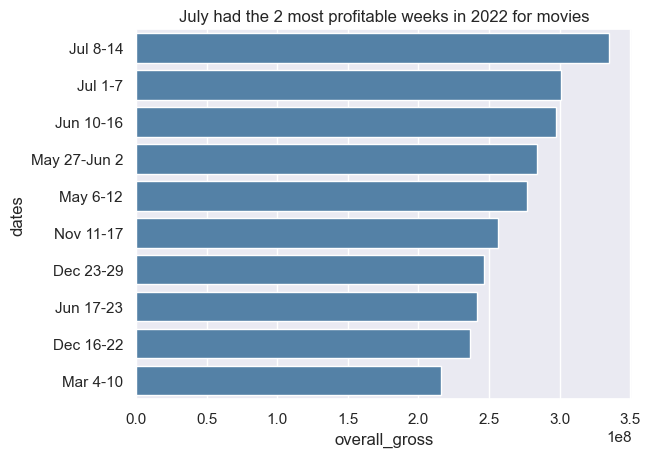

In [115]:
sns.barplot(high_week['overall_gross'],high_week.dates,color='steelblue')
plt.title("July had the 2 most profitable weeks in 2022 for movies")
plt.show()

AttributeError: module 'seaborn' has no attribute 'piechart'